# Analysis of prostate trial data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300
import seaborn as sns
import sys
import os
%config Completer.use_jedi = True

from scipy.stats import f_oneway

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection


sys.path.append("./local/")
import analysisFuns as aFuns
import initialize as initialize

done: set up models
done import aFuns


## data

In [2]:
import scipy
dataDfName = "./data/MCC 19367_C1.xlsx"

patientIdDic = {2:'102', 3:'103', 4:'104', 5:'105',# 
               6:'106',7:'107',8:'108',9:'109',10:'110',
               11:'111',12:'112',13:'113',14:'114',15:'115',
               16:'116',17:'117'} 

prog1=[0,1,1,1,0,0,1,0,1,0,1,1,1,1,0,1]
prog2=[0,2,2,2,1,1,2,0,2,0,2,2,2,2,1,2]
prog3=[0,1,1,1,1,0,1,0,1,0,1,1,1,1,1,1]
prog4=[0,2,2,2,1,1,2,0,2,0,2,2,2,2,0,2]
drug=[1,1,1,1,1,0,0,0,1,0,0,0,0,0,1,0]#abi
GS=[8,7,7,9,8,8,np.nan,9,7,8,9,7,7,7,7,7]
BMs=[6,0,3,4,8,4,0,4,2,1,1,0,1,3,2,0]
LNs=[0,2,0,0,2,0,0,0,1,1,1,3,1,0,2,2]
TMs=[6,2,3,4,10,4,1,4,4,2,2,3,2,3,4,2]
risk=[1,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0]
dNM1=[0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0]
TTP=[ 462,0,0,0,1296,849,0,623,  0,350,0,0,0,0,803,0]
TTRP=[840,0,0,0,   0,849,0,889,  0,735,  0,0,0,0,0,0]
DOD=[1039,0,0,0,1593,989,0,  0,  0,0,0,0,0,0,0,0]

#model fits
col0=['r','k','k','k','b','r','k','r','k','r','k','k','k','k','b','k']
rPSA=[14, 7.0, 5.2, 8.5, 6.0, 8.0, 16., 6.9, 9.0, 7.0, 4.5, 5.0, 10., 10., 4.0,10.5]
dD=[.035,.073,.068,.068,.074,.065,.041,.027,.076,.053,.045,.066,.045,.049,.037,.061]
rD=[.038,.0015,.052,.0041,.041,.038,.019,.058,.017,.045,.018,.023,.023,.020,.016,.020]
xS=[  49,    3,  11,    4,   2,   6,   2,  48,   6,   2,   6,   4,  10,   7,  48,   2]

#data fits!!
#tx on
maxP=[1,1,1,1,1,1,1,1,1,.5,1,1,1,1,1,1]
dRP=[.024,.075,.064,.074,.078,.062,.059,.023,.09,.045,.04,.05,.045,.052,.029,.059]#dataD2['PSA'].iloc[0]*math.exp(-.024*t)
#tx off
nadP=[.3,1,1,1,.9, .3,1,.8,.3,.9,.7,.5,1,1,.7,1]#nad*(dataD2['PSA'].iloc[0]+dataD2['PSA'].iloc[2])+PSA0/(1+math.exp(-.07*(t-140))))
maxPP=[3,.32,1.1,.1,1, 1,.7,1,1,1,1,1,5,1,1,1]
PSAind=[0,0,0,1,0, 0,0,0,0,1,0,0,0,0,0,0] 
gRP=[.078,.02,.14,.13,.13, .08,.03,.08,.047,.059,.06,.06,.065,.065,.025,.085]
tdelayP=[160,450,90,90,100, 140,230,105,290,152,120,205,190,78,240,95]

nadP2=[.3, .7,  1,  1, .8, .3,   1, .7,  .1, .8,  .6, .37,   1, .8, .6, .8]
gRP2=[.02,.01,.04,.03,.04,.03,.015,.02,.016,.01,.025,.015,.017,.04,.01,.04]

#testost....
minT=[2,2,2,2,.05,.05,.1,2,.1,28,23,13,6,25,4,30]
dRT=[.17,.16,.18,.15,.067,.08,.034,.21,.141,.1,.12,.17,.16,.13,.15,.07]#dataD2['PSA'].iloc[0]*math.exp(-.024*t)
#tx off
maxTT=[.5,.5,1.3,.9,1.6,.5,.7,1.2,.6,.015,1.1,.55,.8,.95,1,.5]
Tind=[0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0] 
gRT=[.1,.11,.1,.1,.19,.13,.1,.08,.06,.1,.06,.07,.12,.13,.025,.095]
tdelayT=[113,80,95,69,82,107,75,105,180,30,80,150,130,35,280,40]

dataVals=pd.DataFrame()
dataVals['prog1']=prog1
dataVals['prog2']=prog2
dataVals['prog3']=prog3
dataVals['prog4']=prog4
dataVals['TTP']=TTP
dataVals['drug']=drug
dataVals['GS']=GS
dataVals['BMs']=BMs
dataVals['LNs']=LNs
dataVals['TMs']=TMs
dataVals['risk']=risk
dataVals['dNM1']=dNM1
dataVals['TTP']=TTP
dataVals['DOD']=DOD
modVals=pd.DataFrame()
#modVals['C0']=C0
modVals['rD']=rD
modVals['dD']=dD
modVals['rPSA']=rPSA
modVals['xS']=xS
fitVals=pd.DataFrame()
fitVals['dRP']=dRP
fitVals['maxP']=maxP
fitVals['nadP']=nadP
fitVals['maxPP']=maxPP
fitVals['gRP']=gRP
fitVals['tdelayP']=tdelayP
fitVals['minT']=minT
fitVals['dRT']=dRT
fitVals['maxTT']=maxTT
fitVals['gRT']=gRT
fitVals['tdelayT']=tdelayT
fitVals['gRP2']=gRP2

## calculate metrics for 1st cycle

In [3]:
allDf=pd.DataFrame()
for pi,pat in enumerate(patientIdDic):
    dataDf=initialize.loadData(dataDfName,patientIdDic[pat])
    #pData = aFuns.calculateMetrics(pat,pi,dataDf,dataVals,modVals,fitVals)
    pData = aFuns.calculateMetrics(pat,pi,dataDf,dataVals,modVals,fitVals)
    frames0=[allDf, pData]
    allDf=pd.concat(frames0,ignore_index=True)

/Users/gallahja/Moffitt Cancer Center Dropbox/Jill Gallaher/MyPapers/InProgress/PCa early progressors/early_progressors_code_FINAL/./local/initialize.py:98: RuntimeWarning: All-NaN axis encountered
  tmpT=np.nanmax(dataDf0['Testosterone'])
/Users/gallahja/Moffitt Cancer Center Dropbox/Jill Gallaher/MyPapers/InProgress/PCa early progressors/early_progressors_code_FINAL/./local/initialize.py:99: RuntimeWarning: All-NaN axis encountered
  if(np.isnan(np.nanmax(dataDf0['Testosterone']))):


### plot individual patients

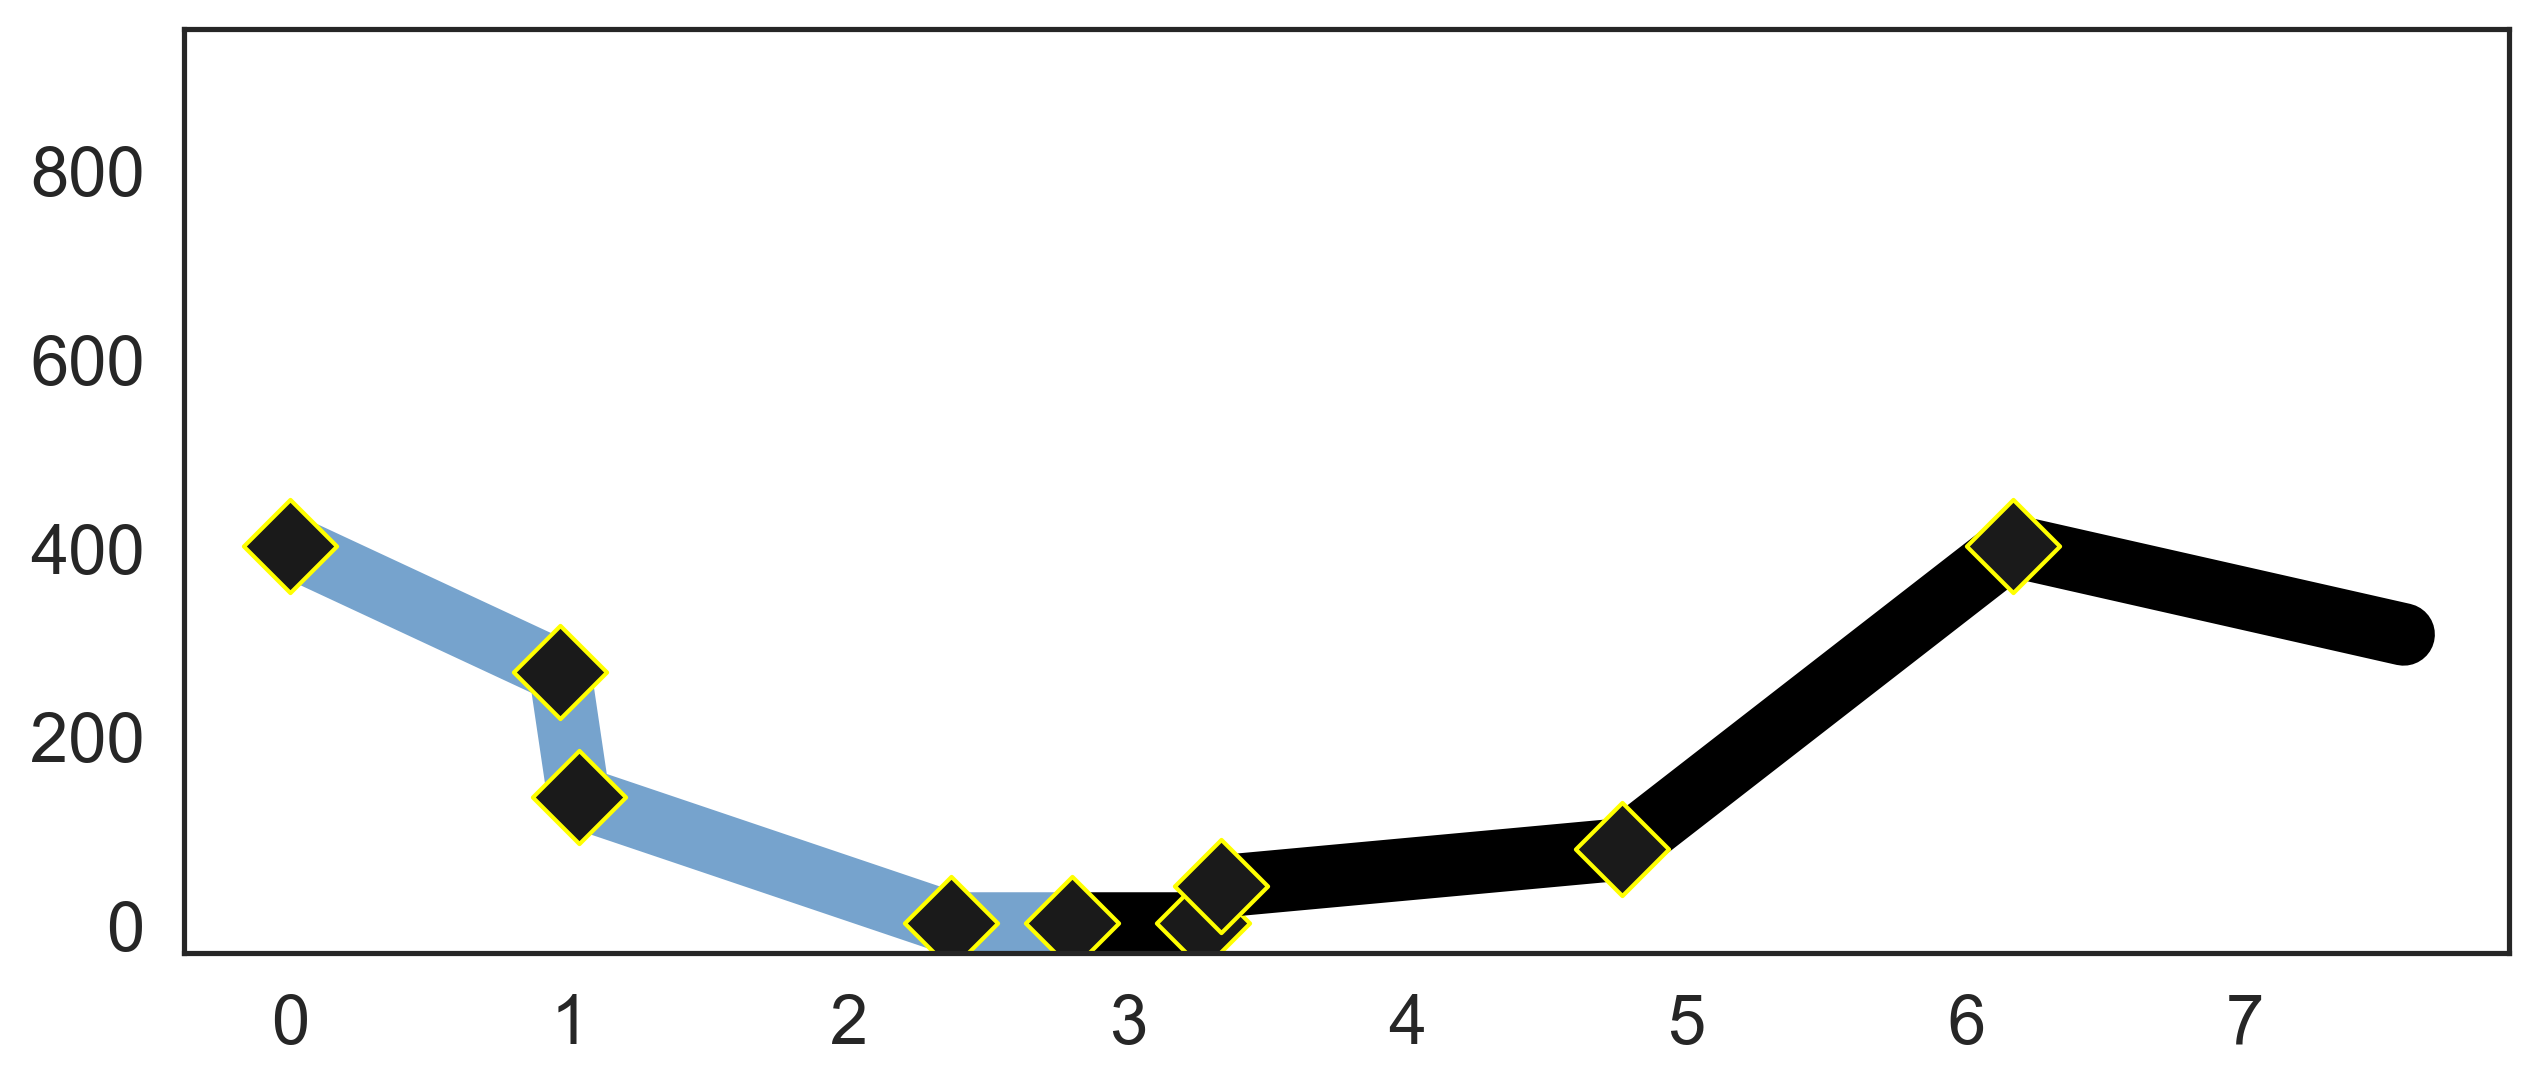

In [4]:
########################################################
# Options
# choose the plot type as PSA, testosterone, or P/T
########################################################
plotType='Testo'#Testosterone = 'Testo'; PSA = 'PSA','Testo'; P/T = 'PT'
patientIdDic0 = {1:'105'}
#patientIdDic0 = {2:'109'}


import math
from matplotlib.patches import Rectangle
import itertools as itools
sns.set(style="white",
        font_scale=1.5,
        rc={'figure.figsize':(10,4)})

colors={1:'k',2:'r'}
palette = {'0': "black",'1':"#CD7A6E",'2':"#76A3CD",'3': "#A07DB4"}

fig, ax = plt.subplots(1, 1)
for patientId in patientIdDic0.keys():
    dataDf = initialize.loadData(dataDfName,patientIdDic0[patientId])
    psa0=10*(math.log(dataDf['PSA'].iloc[0])+1)

    bstr=[]
    indCol=[]
    for i in range(0,len(dataDf['ADT'])):
        tmpARSI=int(np.ceil(dataDf['ARSI'][i]))
        b=str(dataDf['ADT'][i])+str(tmpARSI)
        bstr.append(int(b,2))

    drugOnTimes=[0]
    drugOffTimes=[]
    indOff=0
    indOn=0
    indOn0=0
    bstr0=bstr
    indsOnAll=[]
    while len(bstr0)>1:
        if(0 in bstr0):
            indOff0=bstr0.index(0)
            indOff=indOff+indOff0+indOn0
            drugOffTimes.append(indOff)
            bstr0=bstr0[indOff0:]
            if(sum(bstr0)>0):
                indOn0=np.nonzero(bstr0)[0][0]
                indOn=indOn0+indOff
                indsOnAll.append(indOn)
                drugOnTimes.append(indOn)
                bstr0=bstr0[indOn0:]
            else:
                break
        else:
            break

    dataDf['PSA']=dataDf['PSA'].interpolate()
    dataDf['Testosterone']=dataDf['Testosterone'].interpolate()

    ##### add line
    if(dataDf['PSA'][0]>10):
        tmax0=10-2
    elif(dataDf['PSA'][0]<=2):
        tmax0=.001
    else:
        tmax0=dataDf['PSA'][0]-2
    days=dataDf['Days']/30

    indF=len(dataDf['Days'])-1
    days=dataDf['Days'][0:indF+1]/30
    testo=dataDf['Testosterone'][0:indF+1]
    psa=dataDf['PSA'][0:indF+1]
    
    if(plotType=='Testo'):
        if(patientIdDic0[patientId]=='105'):
            testo[0]=402.2# - 105
        inds=~np.isnan(testo)
        bstrI=list(itools.compress(bstr, inds))
        daysI=list(itools.compress(days, inds))
        testoI=list(itools.compress(testo, inds))
        for bi,b in enumerate(bstr[0:indF]): 
            if(bi>=len(bstr)):
                days=daysI[bi-2:bi]
                testo=testoI[bi-2:bi]
            else:
                days=daysI[bi:bi+2]
                testo=testoI[bi:bi+2]
            ax.plot(days,testo,c=palette[str(b)],linewidth=15.0,zorder=1)
            ax.scatter(dataDf['Days'][bi]/30,dataDf['Testosterone'][bi],color=colors[patientId],s=250,edgecolors='yellow',marker='D')
        days=dataDf['Days']/30
    elif(plotType=='PSA'):
        totalT=0
        for bi,b in enumerate(bstr[0:indF]):
            if(bi>=len(bstr)):
                days=dataDf['Days'].loc[bi-1:bi]/30
                psa=dataDf['PSA'].loc[bi-1:bi]
                testo=testoI[bi-2:bi]
            else:
                days=dataDf['Days'].loc[bi:bi+1]/30
                psa=dataDf['PSA'].loc[bi:bi+1]
            ax.plot(days,psa,c=palette[str(b)],linewidth=15.0,zorder=1)
            ax.scatter(dataDf['Days'][bi]/30,dataDf['PSA'][bi],color=colors[patientId],s=250,edgecolors='yellow',marker='D')
        days=dataDf['Days']/30
    elif(plotType=='PT'):
        if(patientIdDic0[patientId]=='105'):
            testo[0]=402.2# - 105
        inds=~np.isnan(testo)
        bstrI=list(itools.compress(bstr, inds))
        daysI=list(itools.compress(days, inds))
        testoI=list(itools.compress(testo, inds))
        psaI=list(itools.compress(psa,inds))
        for bi,b in enumerate(bstrI[0:indF]):
            if(bi>=len(bstrI)):
                days=daysI[bi-2:bi]
                testo2=testoI[bi-2:bi]
                psa2=psaI[bi-2:bi]
                pt=[0.01*psa2[i]/testo2[i] for i in range(0,len(psa2))]
            else:
                days=daysI[bi:bi+2]
                testo2=testoI[bi:bi+2]
                psa2=psaI[bi:bi+2]
                pt=[0.01*psa2[i]/testo2[i] for i in range(0,len(psa2))]
            ax.plot(days,pt,c=palette[str(b)],linewidth=15.0,zorder=1)
            ax.scatter(dataDf['Days'][bi]/30,0.01*dataDf['PSA'][bi]/dataDf['Testosterone'][bi],color=colors[patientId],s=250,edgecolors='yellow',marker='D')
        days=dataDf['Days']/30

if(plotType=='PSA'):
    plt.ylim([-1,33])
elif(plotType=='Testo'):
    plt.ylim([-30,950])
else:
    plt.ylim([-.001,.022])
#plt.xlim(left=0,right=7.6)
#plt.xlim(left=0,right=7)
#ax.set_yscale('log')


## plot PSA and Testosterone dynamics

/Users/gallahja/Moffitt Cancer Center Dropbox/Jill Gallaher/MyPapers/InProgress/PCa early progressors/early_progressors_code_FINAL/./local/initialize.py:98: RuntimeWarning: All-NaN axis encountered
  tmpT=np.nanmax(dataDf0['Testosterone'])
/Users/gallahja/Moffitt Cancer Center Dropbox/Jill Gallaher/MyPapers/InProgress/PCa early progressors/early_progressors_code_FINAL/./local/initialize.py:99: RuntimeWarning: All-NaN axis encountered
  if(np.isnan(np.nanmax(dataDf0['Testosterone']))):


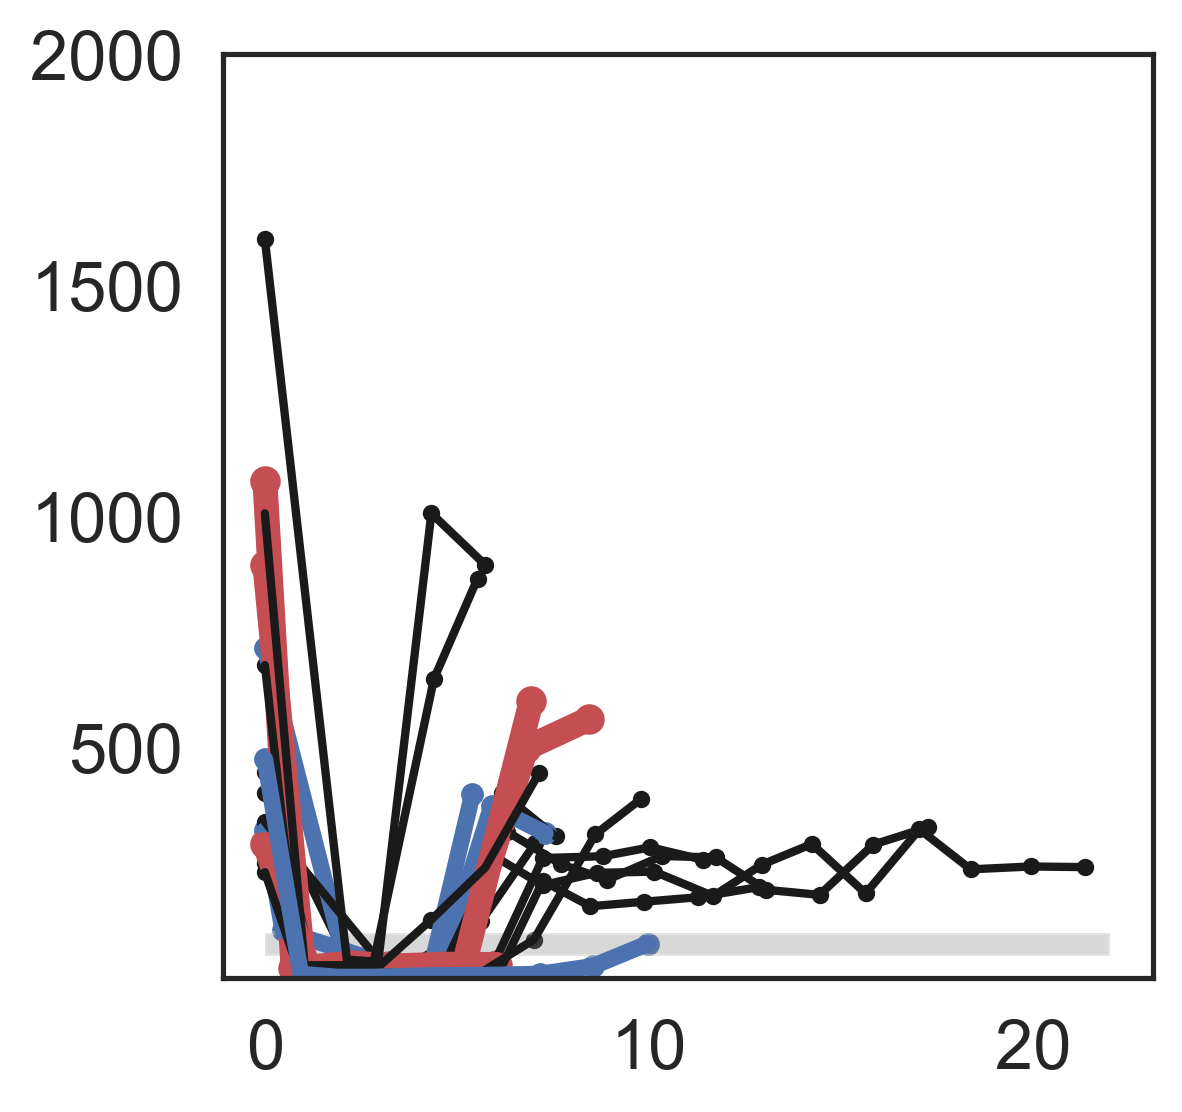

In [25]:
########################################################
# Options:
# choose the plot type as PSA, testosterone
# choose the x-axis scaling as True/False 
# choose the y-axis scaling as Log or Linear
########################################################

PlotType='Testosterone' #'PSA', 'Testosterone', 'PSA/T'
timeScaled=False #True = all patients time scaled over 1st cycle the same; False = time is in days
logScaled=False #True = log scale, False = linear scale

fig, ax = plt.subplots(1, 1, figsize=(4,4))
#fig, ax = plt.subplots(1, 1, figsize=(8,4))
patientOrder=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]

patches = []
for pi,pat in enumerate(patientOrder):
    patId = patientIdDic[pat]
    dataD = initialize.loadData(dataDfName,patId)
    #print(dataD)
    dataD2=dataD.copy()
    dataD2['Days2']=dataD2['Days']-dataD2['Days'].iloc[0]
    if(prog2[pi]==0):
        col='r'
        lw=6
        siz=40
    elif(prog2[pi]==1):
        col='b'
        lw=4
        siz=20
    else:
        col='k'
        lw=2
        siz=10
    if(PlotType=='PSA'):
        inds=np.where(~np.isnan(dataD2['PSA']))[0]
        if(timeScaled):
            plt.plot(dataD2['Days2'].iloc[inds]/dataD2['Days2'].iloc[-1],dataD2['PSA'].iloc[inds],c=col,linewidth=lw)
            plt.scatter(dataD2['Days2'].iloc[inds]/dataD2['Days2'].iloc[-1],dataD2['PSA'].iloc[inds],c=col,s=siz)
        else:
            plt.plot(dataD2['Days2'].iloc[inds]/30,dataD2['PSA'].iloc[inds],c=col,linewidth=lw)
            plt.scatter(dataD2['Days2'].iloc[inds]/30,dataD2['PSA'].iloc[inds],c=col,s=siz)
        
    elif(PlotType=='Testosterone'):
        inds=np.where(~np.isnan(dataD2['Testosterone']))[0]
        if(timeScaled):
            plt.plot(dataD2['Days2'].iloc[inds]/dataD2['Days2'].iloc[-1],dataD2['Testosterone'].iloc[inds],c=col,linewidth=lw)
            plt.scatter(dataD2['Days2'].iloc[inds]/dataD2['Days2'].iloc[-1],dataD2['Testosterone'].iloc[inds],c=col,s=siz)
        else:
            plt.plot(dataD2['Days2'].iloc[inds]/30,dataD2['Testosterone'].iloc[inds],c=col,linewidth=lw)
            plt.scatter(dataD2['Days2'].iloc[inds]/30,dataD2['Testosterone'].iloc[inds],c=col,s=siz)
    
    else:
        inds1=np.where(~np.isnan(dataD2['PSA']))[0]
        inds2=np.where(~np.isnan(dataD2['Testosterone']))[0]
        inds=list(set(inds1) & set(inds2))
        fact=0.01
        if(timeScaled):
            plt.plot(dataD2['Days2'].iloc[inds]/dataD2['Days2'].iloc[-1],fact*dataD2['PSA'].iloc[inds]/dataD2['Testosterone'].iloc[inds],c=col,linewidth=lw)
            plt.scatter(dataD2['Days2'].iloc[inds]/dataD2['Days2'].iloc[-1],fact*dataD2['PSA'].iloc[inds]/dataD2['Testosterone'].iloc[inds],c=col,s=siz)
        else:
            plt.plot(dataD2['Days2'].iloc[inds]/30,fact*dataD2['PSA'].iloc[inds]/dataD2['Testosterone'].iloc[inds],c=col,linewidth=lw)
            plt.scatter(dataD2['Days2'].iloc[inds]/30,fact*dataD2['PSA'].iloc[inds]/dataD2['Testosterone'].iloc[inds],c=col,s=siz)

if(PlotType=='PSA'):
    ax.set_ylim([.005,80])
elif(PlotType=='Testosterone'):
    if(timeScaled):
        tmp=1
    else:
        tmp=22
    ax.add_patch(Rectangle((days[0], 50), tmp, 50,fc='gray',alpha=0.3))#,zorder=10))
    ax.set_ylim([1,2000])
    
if(logScaled):
    ax.set(yscale='log')
#ax.set_ylim([.005,1750])


## statistical analysis

T0
F_onewayResult(statistic=np.float64(0.33063222299358463), pvalue=np.float64(0.7243374696245317))
T_nadir
F_onewayResult(statistic=np.float64(0.707623689210859), pvalue=np.float64(0.5108438180571546))
PSA0
F_onewayResult(statistic=np.float64(1.5903813911194866), pvalue=np.float64(0.24106732496848043))
PSA_nadir
F_onewayResult(statistic=np.float64(10.17599941147451), pvalue=np.float64(0.0021894733120385867))
PerTimeTHighTotal
F_onewayResult(statistic=np.float64(3.880840295732994), pvalue=np.float64(0.047689800455185914))
diffTTotPerPos
F_onewayResult(statistic=np.float64(4.2827833904017565), pvalue=np.float64(0.037255130736115895))
PSA_switch
F_onewayResult(statistic=np.float64(25.86454232923192), pvalue=np.float64(2.940933898483924e-05))
diffPOnPerPos
F_onewayResult(statistic=np.float64(7.174439027368921), pvalue=np.float64(0.007952889420700961))


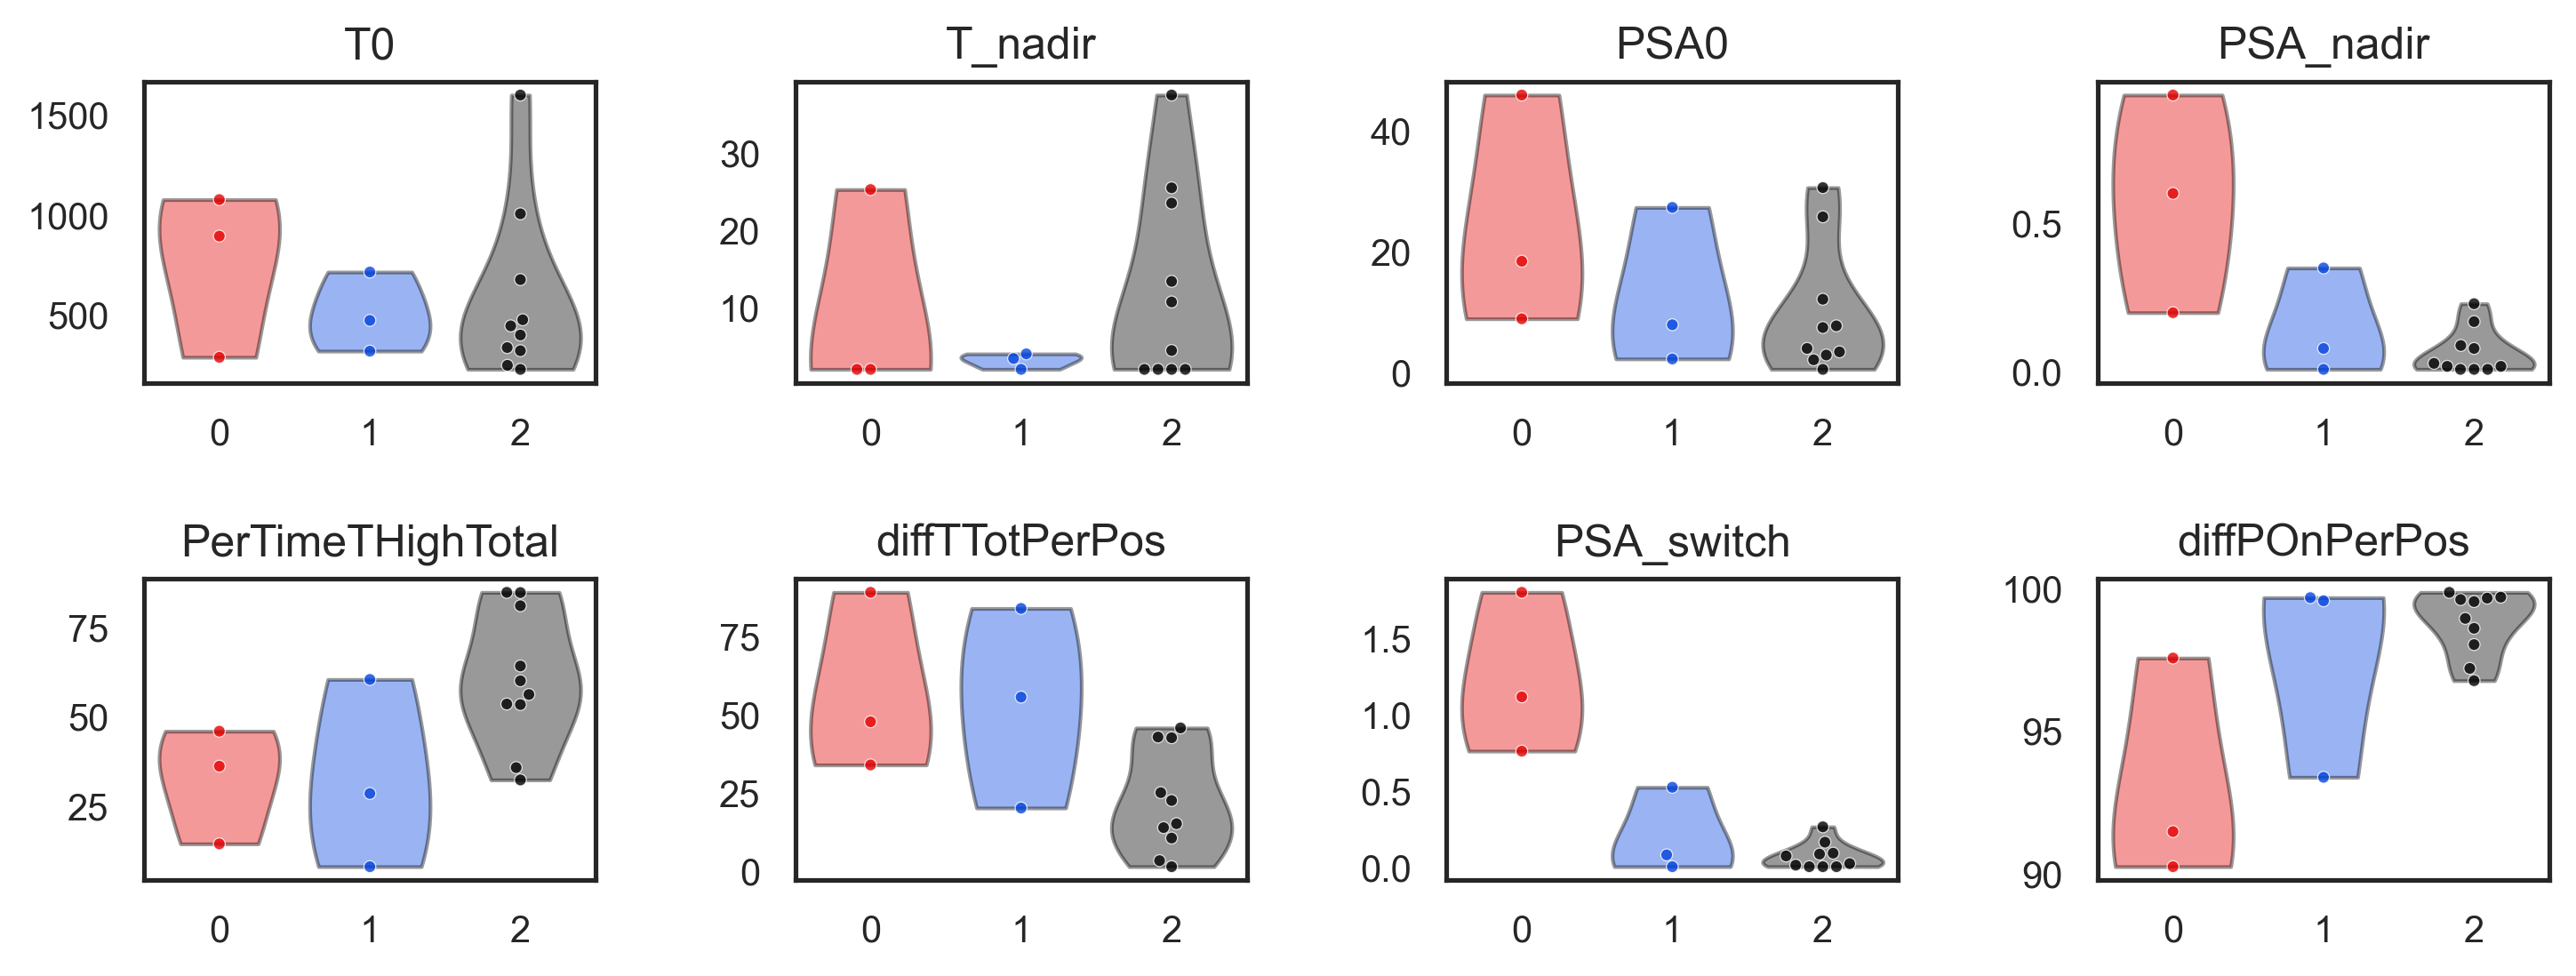

In [13]:
################################################################
# Options:
# choose the data to plot as clinical features, 
# Testosterone and PSA features, or P/T features
################################################################
plotsType = 'Testo&PSA' #'clinical','Testo&PSA','P/T'

palette1 = sns.xkcd_palette(["red", "blue", "black"])
palette2 = sns.xkcd_palette(["red", "black"])

if(plotsType=='clinical'):
    plotNames=['Gleason','TMs','BMs','LNs','risk','dNM1','dAbi']
    rows0=2
    colsN=4
elif(plotsType=='Testo&PSA'):
    plotNames=['T0','T_nadir','PSA0','PSA_nadir','PerTimeTHighTotal','diffTTotPerPos','PSA_switch','diffPOnPerPos']
    rows0=2
    colsN=4
else:
    plotNames=['P0/T0','PF/TF','aveP/T','maxP/T','diffOnPer2','diffOffRate']
    rows0=2
    colsN=4

hueCol='progressed2'#'dAbi'#p2=ELN,p1=PN,p3=rPN
fig, axes = plt.subplots(rows0, colsN, figsize=(10,4))#,gridspec_kw={'width_ratios': [1,1,1,1]}
x=0
y=0
for pn in plotNames:
    print(pn)
    pp=allDf[allDf['names']==pn]
    pp=pp[~np.isnan(pp['values'])]
    if(hueCol=='progressed2'):
        EP=pp[pp[hueCol]==0]['values']
        LP=pp[pp[hueCol]==1]['values']
        NP=pp[pp[hueCol]==2]['values']
        fow=f_oneway(EP, LP, NP)
        palette0=palette1
    elif(hueCol=='progressed1'):
        P=pp[pp['progressed1']==1]['values']
        NP=pp[pp['progressed1']==0]['values']
        fow=f_oneway(P, NP)
        palette0=palette2
    elif(hueCol=='progressed3'):
        P=pp[pp['progressed3']==1]['values']
        NP=pp[pp['progressed3']==0]['values']
        fow=f_oneway(P, NP)
        palette0=palette2
    else:
        EP=pp[pp[hueCol]==0]['values']
        LP=pp[pp[hueCol]==1]['values']
        NP=pp[pp[hueCol]==2]['values']
        fow=f_oneway(EP, LP, NP)
        palette0=palette1

    print(fow)
    if(pn=='Gleason'):
        inds=pp['values'].isnull()
        pp=pp[~inds]

    plots=sns.violinplot(data=pp, x=hueCol, y='values', cut=0,
               density_norm='width',inner=None, linewidth=1, palette=palette0,hue=hueCol, 
               saturation=1, ax=axes[y][x])
    
    for patch in plots.collections:
        patch.set_alpha(0.4)
    
    sns.swarmplot(data=pp, x=hueCol, y='values', hue=hueCol,ax=axes[y][x],#jitter=True,
               palette=palette0,size=3.2,alpha=.8,linewidth=0.3,edgecolor='white')#, order=ordered)#s=5,

    axes[y][x].get_legend().remove()
    axes[y][x].set_title(pn,fontsize=12)
    axes[y][x].set_xlabel('')
    axes[y][x].set_ylabel('')
    axes[y][x].tick_params(labelsize=10)

    x=x+1
    if(x>=colsN):
        x=0
        y=y+1
plt.tight_layout()

## multivariate analysis

In [14]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

dfNew=pd.DataFrame()
for pN in np.unique(allDf['names']):
    if(pN!='Gleason'):
        vals=allDf[allDf['names']==pN]['values']
        vals=vals.reset_index(drop = True)
        dfNew[pN]=vals

cols=['PSA_switch','aveP/T','diffPOnPer']
dfNew2=dfNew[cols]

# Create a KMeans model with 2 clusters
kmeans = KMeans(n_clusters=2)

# Fit the model to the data
kmeans.fit(dfNew2)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Add the labels to the DataFrame
dfNew2['cluster'] = labels

print(dfNew2)

kmeans.cluster_centers_

    PSA_switch    aveP/T  diffPOnPer  cluster
0     1.802857  0.002612   -0.902601        0
1     0.010000  0.000172   -0.998674        1
2     0.010000  0.000184   -0.995455        1
3     0.092222  0.000198   -0.996996        1
4     0.087059  0.000187   -0.996825        1
5     0.010000  0.000034   -0.995726        1
6     0.010000  0.000033   -0.996656        1
7     0.765094  0.004538   -0.914895        0
8     0.030000  0.000160   -0.996164        1
9     1.120000  0.000684   -0.975668        0
10    0.098095  0.000073   -0.972053        1
11    0.080000  0.000076   -0.980392        1
12    0.020000  0.000067   -0.967742        1
13    0.170000  0.000131   -0.986088        1
14    0.528723  0.001355   -0.933910        1
15    0.270213  0.000082   -0.989555        1


/var/folders/y3/nxptvxqn0z12b_ylwgl4x68h000wg8/T/ipykernel_40111/2488707498.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfNew2['cluster'] = labels


array([[ 1.22931716e+00,  2.61122900e-03, -9.31054637e-01],
       [ 1.08947112e-01,  2.11646596e-04, -9.85094973e-01]])

/var/folders/y3/nxptvxqn0z12b_ylwgl4x68h000wg8/T/ipykernel_40111/1522557642.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfNew2['cats']=cats


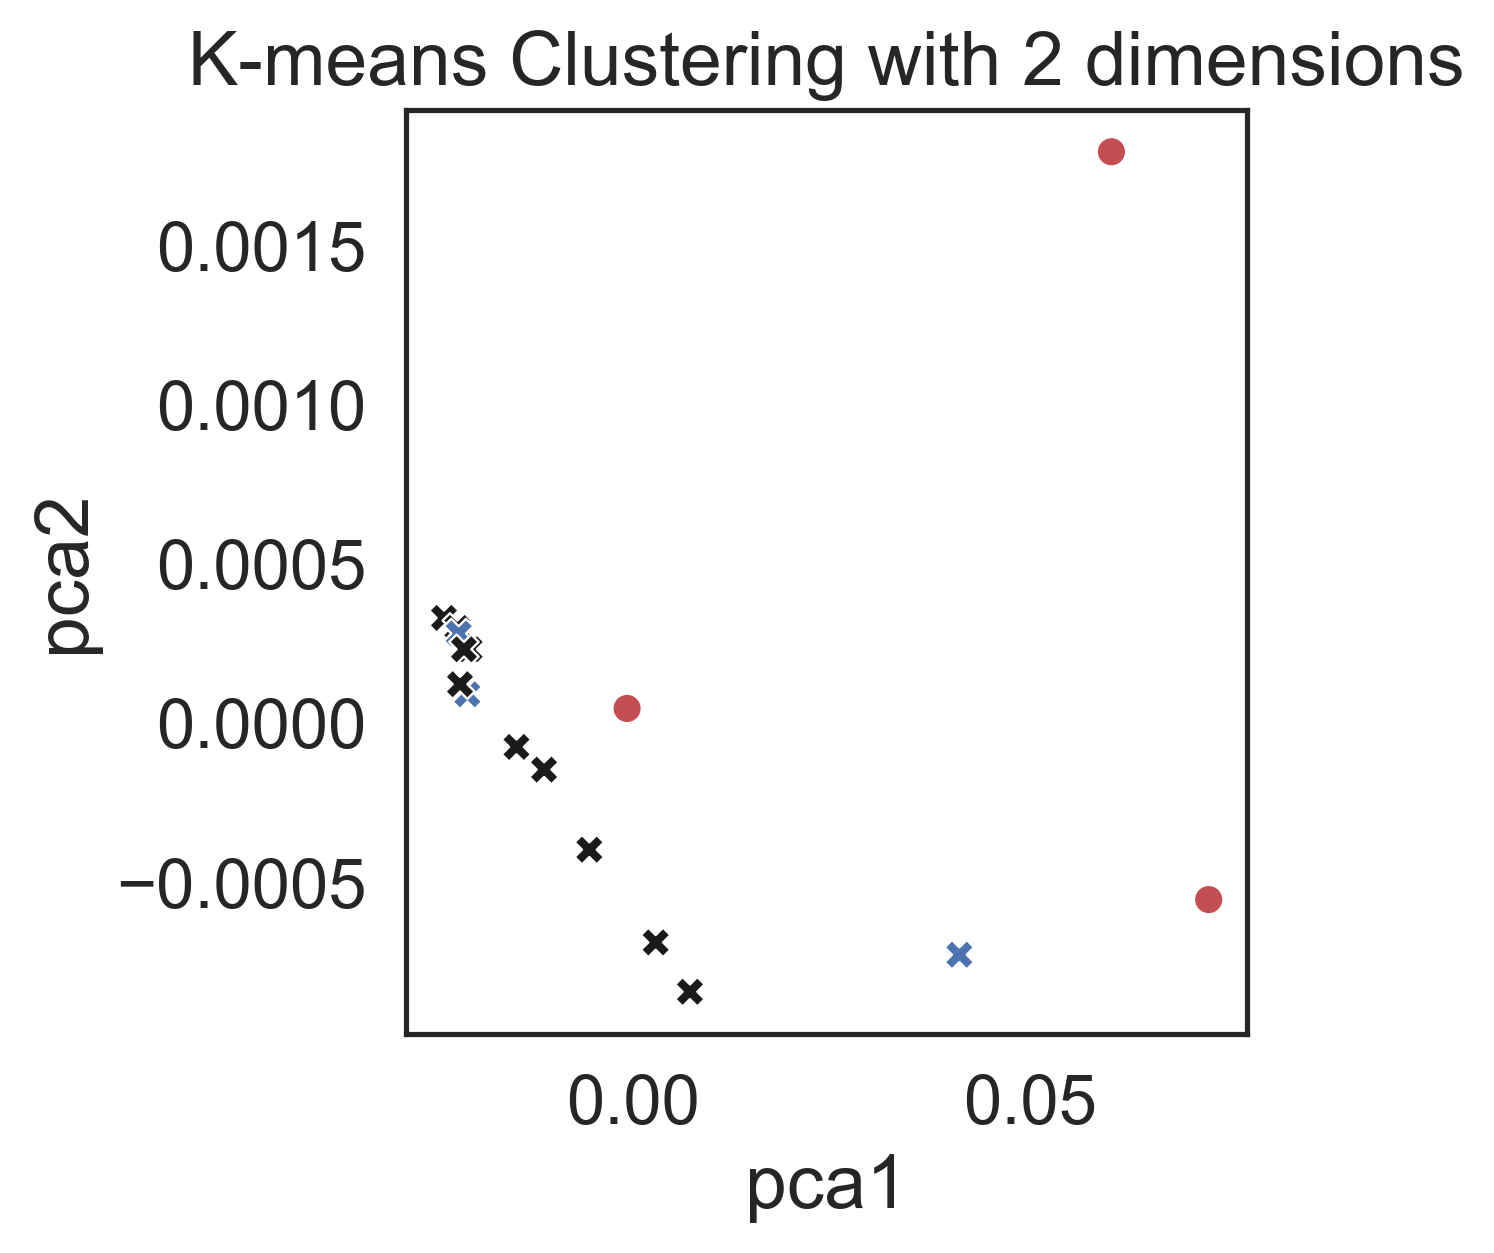

In [15]:
cats=[0,2,2,2,1,1,2,0,2,0,2,2,2,2,1,2]
dfNew2['cats']=cats

pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(dfNew2.iloc[:,1:3])
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", data=results, style=dfNew2['cluster'],color='black',s=50,palette=['r','b','k'],hue=dfNew2['cats'])
plt.title('K-means Clustering with 2 dimensions')
plt.gca().set_aspect(40)
plt.legend('', frameon=False)
plt.show()

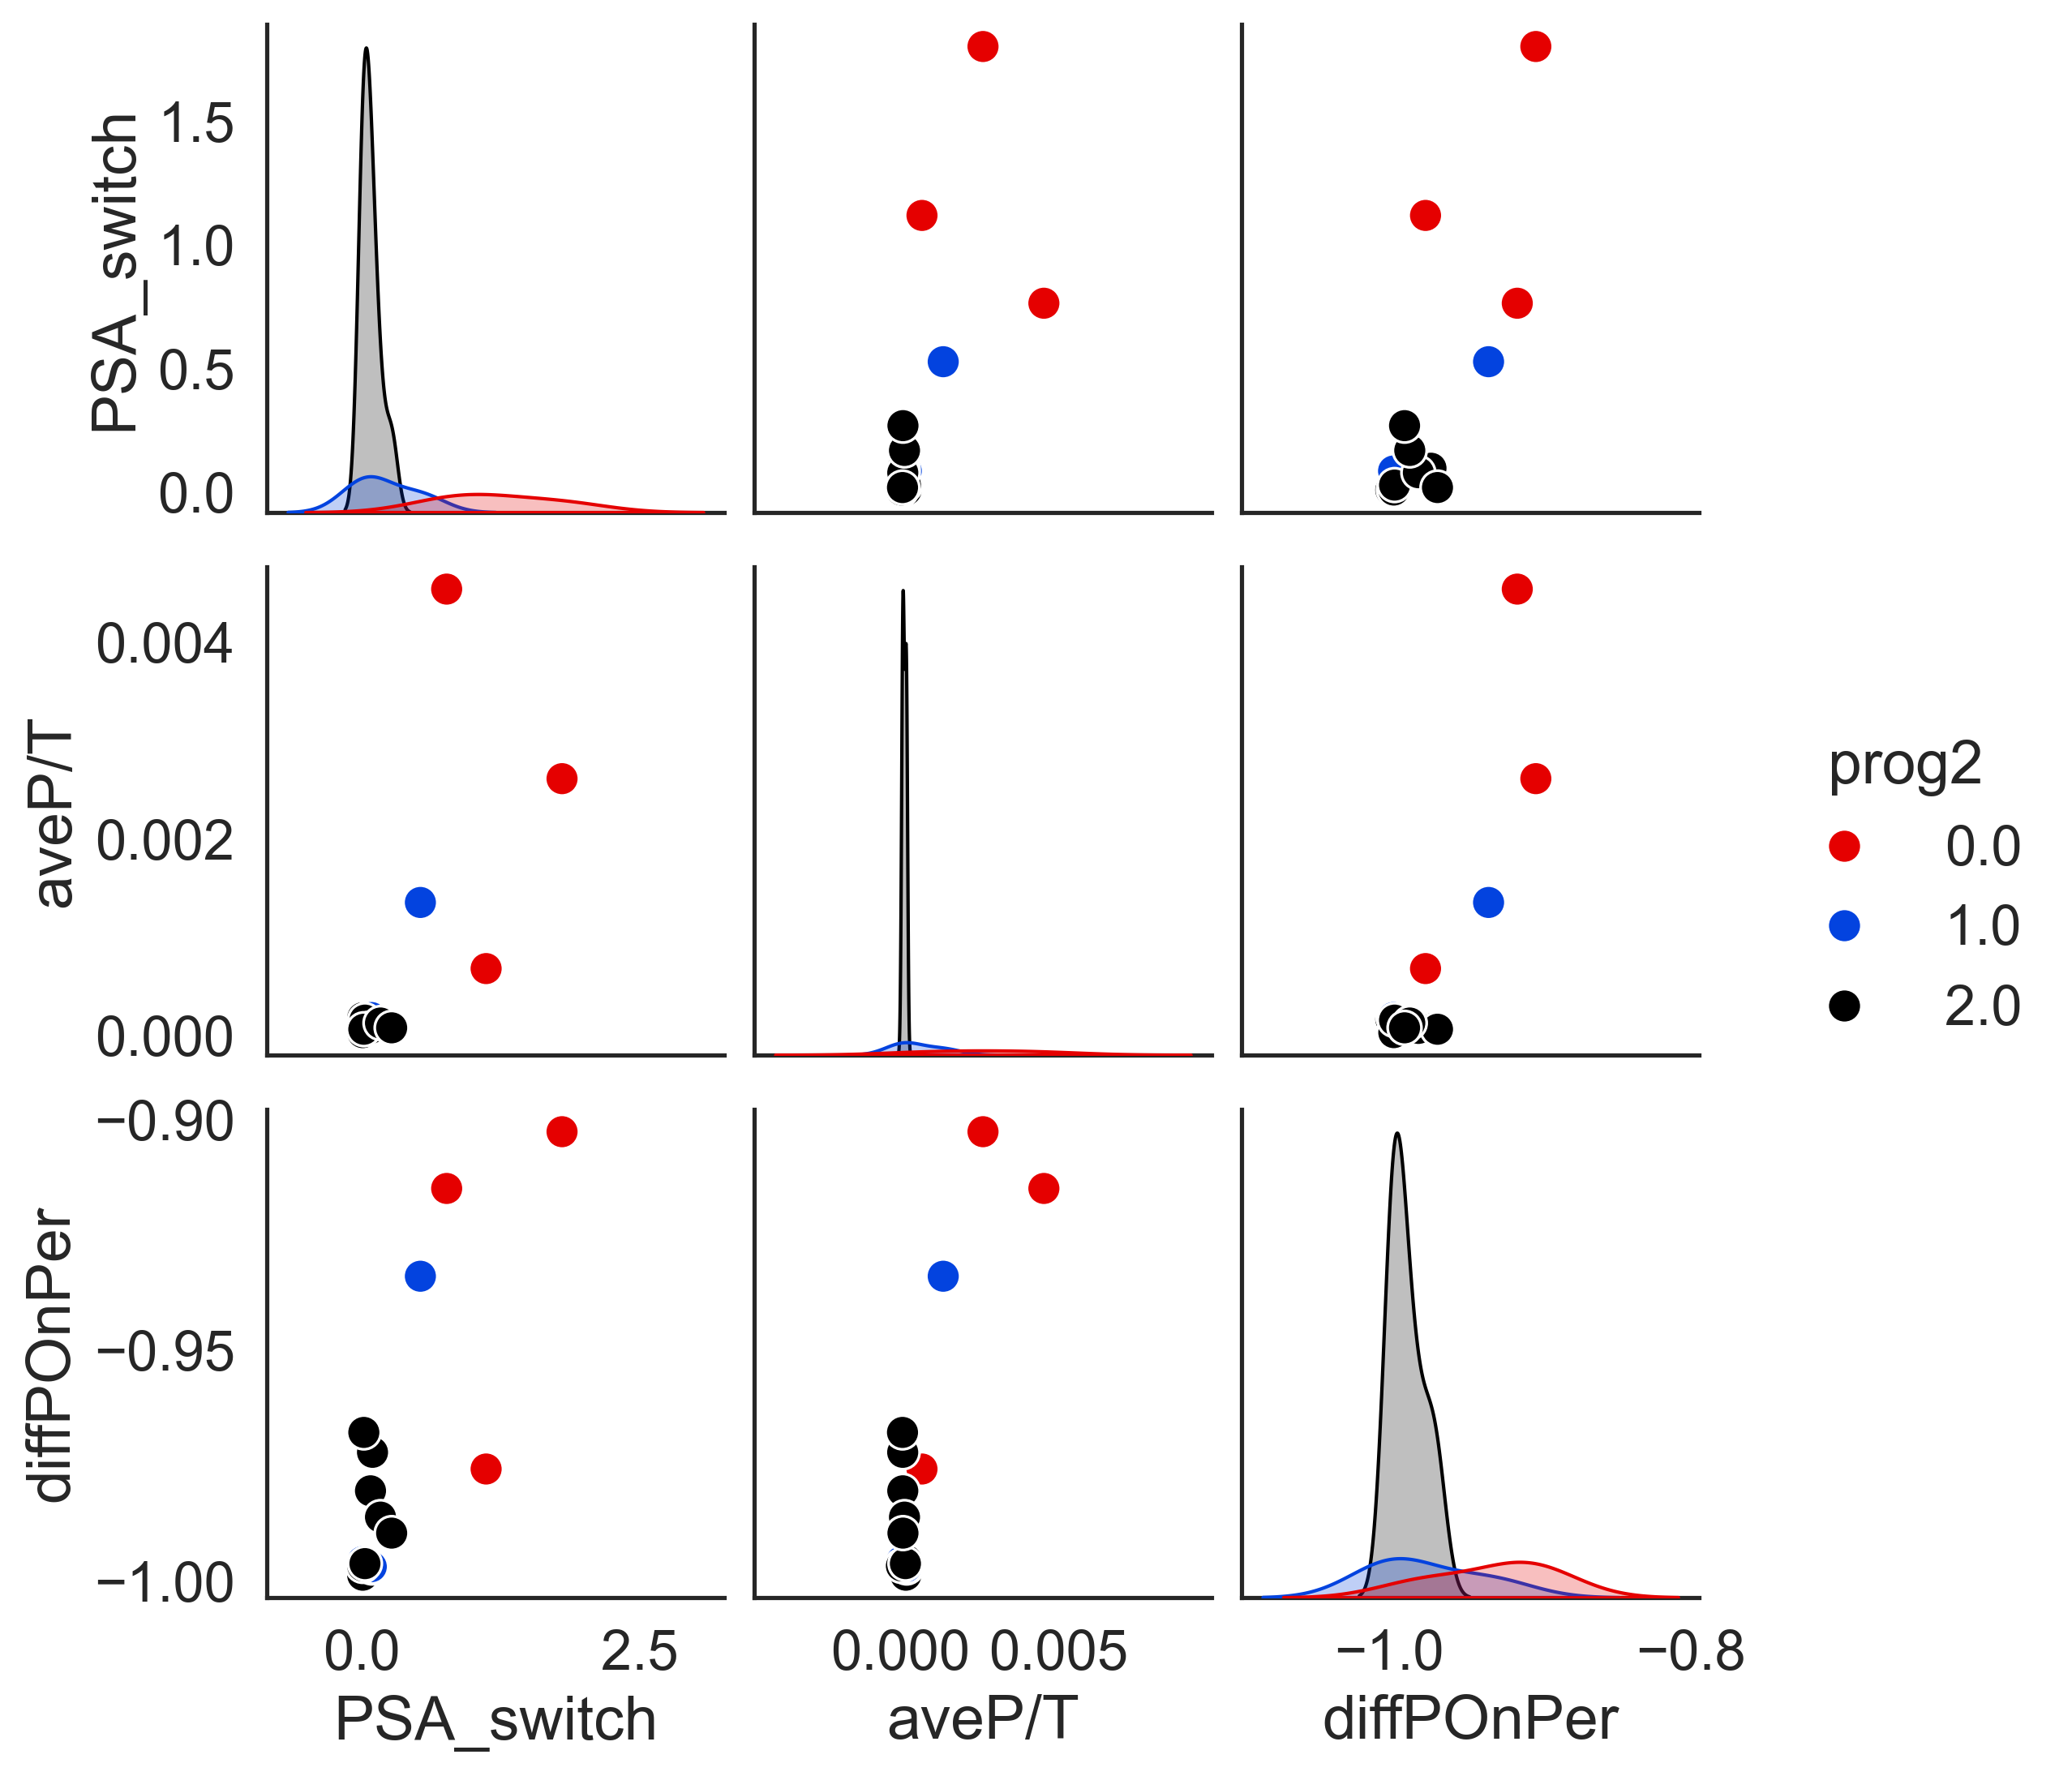

In [16]:
import plotly.express as px
col0=['r','k','k','k','b','b','k','r','k','r','k','k','k','k','b','k']
features = [ "PSA_switch","aveP/T","diffPOnPer","prog2"]
dfF=dfNew[features]
sns.pairplot(dfF,hue='prog2',palette=palette1,diag_kind="kde",kind='scatter',plot_kws={"s": 100})